In [2]:
# get helper functions
# ! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

In [3]:
from helper_functions import (
    create_tensorboard_callback,
    plot_loss_curves,
    unzip_data,
    walk_through_dir
)

# Experiment 0

In [4]:
# ! wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-02-24 07:56:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  22.9MB/s    in 8.0s    

2023-02-24 07:56:38 (20.0 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [6]:
# ! unzip 10_food_classes_10_percent.zip

In [7]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [9]:
IMG_SIZE = (224, 224)
TRAIN_DIR = "10_food_classes_10_percent/train"
TEST_DIR = "10_food_classes_10_percent/test"
BATCH_SIZE = 32

In [10]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(TRAIN_DIR,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="categorical",
                                                                 batch_size=BATCH_SIZE,
                                                                 seed=42)
test_data = tf.keras.preprocessing.image_dataset_from_directory(TEST_DIR,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE,
                                                                seed=42)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [11]:
type(train_data), type(test_data)

(tensorflow.python.data.ops.dataset_ops.BatchDataset,
 tensorflow.python.data.ops.dataset_ops.BatchDataset)

In [12]:
# image_dataset_from_directory creates batches of images

In [13]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [14]:
# see an example of a batch
for image,label in train_data.take(1):
  print(image)
  print(label)

tf.Tensor(
[[[[1.10000000e+02 6.32397957e+01 0.00000000e+00]
   [1.18780609e+02 7.49744949e+01 7.37755108e+00]
   [1.06168365e+02 6.54438782e+01 1.02551079e+00]
   ...
   [9.51429443e+01 5.70000000e+01 2.21426392e+00]
   [1.04714348e+02 6.15000267e+01 8.57146740e+00]
   [1.10357109e+02 6.33571091e+01 9.35710812e+00]]

  [[1.14693878e+02 7.08877563e+01 4.36224604e+00]
   [1.14423470e+02 7.30051041e+01 7.14285660e+00]
   [1.10346939e+02 7.12346954e+01 6.29081631e+00]
   ...
   [9.44694366e+01 5.59285736e+01 1.34179497e+00]
   [1.00285751e+02 5.70714264e+01 4.14286995e+00]
   [1.07311264e+02 5.74490089e+01 4.40309334e+00]]

  [[1.07239792e+02 6.82346954e+01 7.65306503e-02]
   [1.13382652e+02 7.48112259e+01 7.59694004e+00]
   [1.13469383e+02 7.48520432e+01 9.94387722e+00]
   ...
   [9.81888351e+01 5.96173630e+01 5.04589176e+00]
   [1.02857155e+02 5.68571548e+01 4.85715580e+00]
   [1.09576607e+02 5.95766068e+01 6.57660770e+00]]

  ...

  [[9.08060455e+01 6.93775177e+01 2.37751961e+00]
   [9

In [18]:
# model_0 -> using the functional API on 10% data without augumentation

# create base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# freeze the base model
base_model.trainable = False

# create inputs
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer") 

# pass inputs to base model
x = base_model(inputs)
print(f"Shape after passing inputs through base model is {x.shape}")

# average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after passing through global average pooling is {x.shape}")

# create outputs
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)  

# combine inputs and outputs to form a model
model_0 = tf.keras.Model(inputs, outputs)

# compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

Shape after passing inputs through base model is (None, 7, 7, 1280)
Shape after passing through global average pooling is (None, 1280)


In [19]:
# train the model 
history_0 = model_0.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5
24/24 [==============================] - 16s 443ms/step - loss: 1.8210 - accuracy: 0.4707 - val_loss: 1.2699 - val_accuracy: 0.7516
Epoch 2/5
24/24 [==============================] - 8s 314ms/step - loss: 1.0592 - accuracy: 0.7920 - val_loss: 0.8489 - val_accuracy: 0.8288
Epoch 3/5
24/24 [==============================] - 7s 296ms/step - loss: 0.7638 - accuracy: 0.8373 - val_loss: 0.6832 - val_accuracy: 0.8476
Epoch 4/5
24/24 [==============================] - 8s 332ms/step - loss: 0.6249 - accuracy: 0.8640 - val_loss: 0.5984 - val_accuracy: 0.8540
Epoch 5/5
24/24 [==============================] - 12s 510ms/step - loss: 0.5311 - accuracy: 0.8840 - val_loss: 0.5453 - val_accuracy: 0.8624


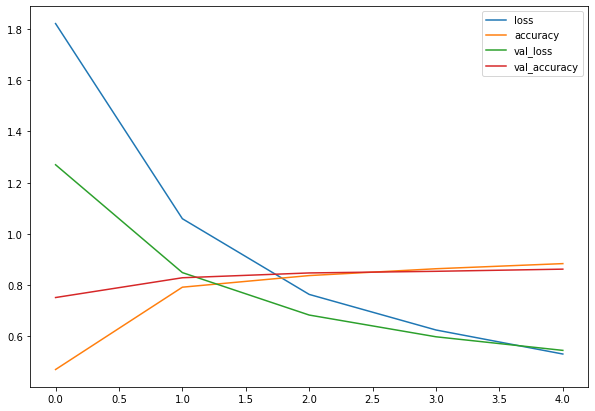

In [20]:
pd.DataFrame(history_0.history).plot(figsize=(10,7))
plt.show()

In [22]:
# check the layers of the model which we made
for index, layer in enumerate(model_0.layers):
  print(index, layer)

0 <keras.engine.input_layer.InputLayer object at 0x7f2848c42e20>
1 <keras.engine.functional.Functional object at 0x7f283fe7f4c0>
2 <keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7f283fdd2190>
3 <keras.layers.core.dense.Dense object at 0x7f28490c8280>


In [24]:
# check the layers of the base_model
for index, layer in enumerate(base_model.layers):
  print(index, layer)

0 <keras.engine.input_layer.InputLayer object at 0x7f284237e970>
1 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f284237eac0>
2 <keras.layers.preprocessing.normalization.Normalization object at 0x7f284237ee80>
3 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f284225b790>
4 <keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7f284225b6d0>
5 <keras.layers.convolutional.conv2d.Conv2D object at 0x7f28421e70a0>
6 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f28421e7700>
7 <keras.layers.core.activation.Activation object at 0x7f28421e7310>
8 <keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x7f28421ee9a0>
9 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f28578c3880>
10 <keras.layers.core.activation.Activation object at 0x7f28421fbdf0>
11 <keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7f28421fbd60>
12 <keras.l

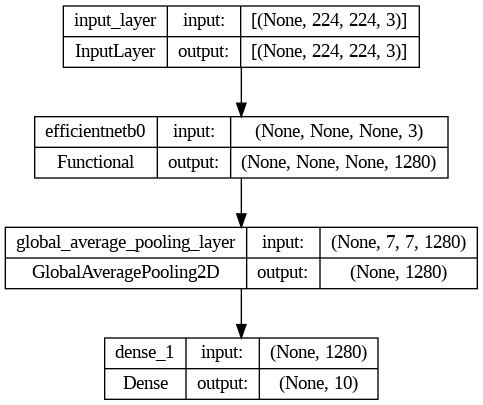

In [26]:
tf.keras.utils.plot_model(model_0, show_shapes=True)

# Experiment 1

In [28]:
# ! wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

In [30]:
# ! unzip 10_food_classes_1_percent.zip

In [32]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'

In [34]:
IMG_SIZE = (224, 224)
TRAIN_DIR = "10_food_classes_1_percent/train"
TEST_DIR = "10_food_classes_1_percent/test"
BATCH_SIZE = 32

In [35]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(TRAIN_DIR,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="categorical",
                                                                 batch_size=BATCH_SIZE,
                                                                 seed=42)
test_data = tf.keras.preprocessing.image_dataset_from_directory(TEST_DIR,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE,
                                                                seed=42)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [38]:
# for data augumentation, use the experimental.preprocessing layer as it auguments on the GPU, unlike ImageDataGenerator which auguments on the CPU

In [46]:
# create data_augumentation stage
data_augumentation = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
], name="data_augumentation")

In [48]:
# model_1 -> using the functional API on 1% data with augumentation

# setup base
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# freeze the base 
base_model.trainable = False

# setup inputs
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# add data augumentations
x = data_augumentation(inputs)

# pass data to base
x = base_model(x, training=True)

# add pooling
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# setup outputs
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

# make model
model_1 = tf.keras.Model(inputs, outputs)

# compile model
model_1.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [50]:
# training the model
history_1 = model_1.fit(train_data, epochs=5, validation_data=test_data, validation_steps=int(0.25*len(test_data)))

Epoch 1/5
3/3 [==============================] - 3s 1s/step - loss: 2.3417 - accuracy: 0.1000 - val_loss: 2.3325 - val_accuracy: 0.0888
Epoch 2/5
3/3 [==============================] - 2s 921ms/step - loss: 2.3301 - accuracy: 0.0857 - val_loss: 2.3231 - val_accuracy: 0.1086
Epoch 3/5
3/3 [==============================] - 2s 927ms/step - loss: 2.3405 - accuracy: 0.0714 - val_loss: 2.3293 - val_accuracy: 0.0954
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 2.3345 - accuracy: 0.1000 - val_loss: 2.3269 - val_accuracy: 0.1003
Epoch 5/5
3/3 [==============================] - 2s 934ms/step - loss: 2.3293 - accuracy: 0.0857 - val_loss: 2.3309 - val_accuracy: 0.0757
